In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
class linearregression():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        #self.d = X.shape[1]
    
    def train(self):
        Z = np.concatenate([self.X, np.ones([self.n, 1])], axis=1)
        v1 = 1/self.n * np.matmul(Z.T, Z)
        v2 = 1/self.n * np.matmul(Z.T, self.Y)
        v = np.matmul(np.linalg.inv(v1), v2)
        self.w = v[:-1]
        self.b = v[-1]
    
    def predict(self, x):
        return np.matmul(x, self.w) + self.b
    
    def RMSE(self, X, Y):
        return np.sqrt(np.mean(np.square(self.predict(X)-Y)))
    
    def R2(self, X, Y):
        return 1 - np.sum(np.square(self.predict(X)-Y)) / (np.sum(np.square(Y-np.mean(Y, axis=0))) + 1e-12)

## 単回帰分析

y = 3 x + 5.013


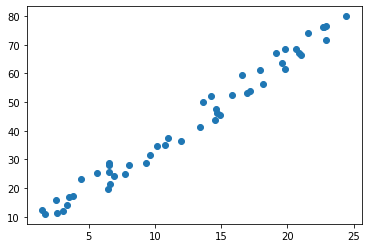

In [137]:
np.random.seed(314)
templature = 25 * np.random.rand(50, 1)
np.random.seed(159)
sell = 3 * templature + 10 * np.random.rand(50, 1)
plt.scatter(templature, sell)
np.random.seed(159)
print('y = {} x + {:.3f}'.format(3, 10*np.average(np.random.rand(50))))

In [142]:
thres = int(templature.shape[0]*0.9)
X_train = templature[:thres, :]
Y_train = sell[:thres, :]
X_test = templature[thres:, :]
Y_test = sell[thres:, :]

model = linearregression(X_train, Y_train)
model.train()
print("RMSE = ", model.RMSE(X_test, Y_test))
print("R2 = ", model.R2(X_test, Y_test))
print('y = {:.3f} x + {:.3f}'.format(model.w[0][0], model.b[0]))

RMSE =  3.50806810773
R2 =  0.980458384704
y = 3.001 x + 5.005


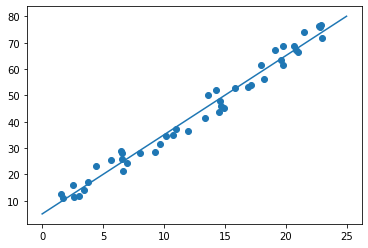

In [143]:
xs = np.linspace(0,25,1000)
ys = model.predict(xs[:, np.newaxis])
plt.scatter(X_train, Y_train)
plt.plot(xs, ys)

## 重回帰分析

In [145]:
from sklearn.datasets import load_boston
import pandas as pd

In [146]:
boston = load_boston()
dataset = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
dataset['price'] = boston['target']
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [194]:
Y = np.array(dataset['price'])
Y = Y[:, np.newaxis]
X = np.array(dataset[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
 'TAX', 'PTRATIO', 'B', 'LSTAT']])
thres = int(X.shape[0] * 0.9)
X_train = X[:thres, :]
Y_train = Y[:thres, :]
X_test = X[thres:, :]
Y_test = Y[thres:, :]

RMSE =  3.2876873776
R2 =  0.428690368349
相関係数：  0.765713635303


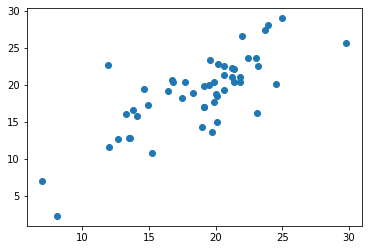

In [195]:
model = linearregression(X_train, Y_train)
model.train()
print("RMSE = ", model.RMSE(X_test, Y_test))
print("R2 = ", model.R2(X_test, Y_test))
#print('w:{} \n b:{}'.format(model.w, model.b))
plt.scatter(Y_test, model.predict(X_test))
print("相関係数： ", np.corrcoef(Y_test[:,0], model.predict(X_test)[:,0])[0, 1])